This code explains the concept of ***gradient descent*** for a simple 2 dimension *regression* problem.
This code is inspired by the "*Gradient Descent in Python*" from towardsdatascience.com


For this time, we won't use any machine learning framework, but instead see how we can solve it with only numpy for mathematical calculations.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Creating and vizualizing our function

First, let's create the affine function we will want to approximate. The rand function here permits us to add some noise to our data.

In [0]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

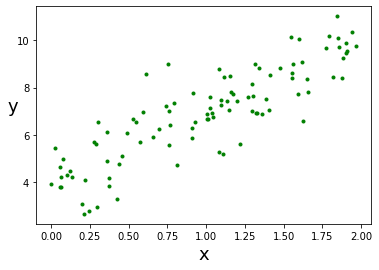

In [0]:
plt.plot(X,y,'g.')
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.show()

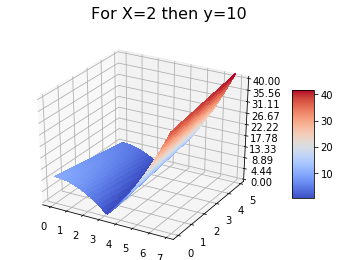

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure()
ax = fig.gca(projection='3d')
theta_1 = np.arange(0,7, 0.10)
theta_2 = np.arange(0, 5, 0.10)
theta_1, theta_2 = np.meshgrid(theta_1, theta_2)
concat_theta = np.c_[theta_1,theta_2]

# Fix X=2 => y=10
# we want this value to be as small as possible
error_theta=  np.absolute(10- (theta_1**2 + theta_2))

# Plot the surface.
surf = ax.plot_surface(theta_1, theta_2, error_theta, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

#Title
plt.suptitle('For X=2 then y=10', fontsize = 16)
plt.show()

# Recreate the functions for gradient descent

Here, we remind the formulas seen in the presentation for our optimization method: the cost, gradient and how each gradients are computed.
**h** is the array containing the predictions of our model. **y** are the true output values of our data. **m** is the number of elements.

<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Formula for updating the gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}


If we identify the terms, we hence have:

\begin{equation}
\theta_0: = \theta_0 -\alpha . (\partial J(\theta)/\partial\theta_0)
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (\partial J(\theta)/\partial\theta_1)
\end{equation}

Recall the concept of gradient:

1.   If **positif**, we have *ascending* values
2.   If **negatif**, we have *descending* values
3.   If equal to **0**, we are in a local *minimum* or *maximum*




![Texte alternatif…](http://media5.datahacker.rs/2018/06/word-image-30.jpeg)

In [0]:
def  cal_cost(theta,X,y):
    
    # We need the number of elements, we could use both X or y
    m = len(X)
    # predict the values of y in function of X and our actual weights
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


In [0]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):

    # Fine the length of the number of elements
    # can work for both x or y, as each element is assigned to a value
    m = len(y)

    # Save the cost for each iteration
    cost_history = np.zeros(iterations)
    #save the weights for each iterations
    theta_history = np.zeros((iterations,2))

    for i in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[i,:] =theta.T
        cost_history[i]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history
  

# Train our model to get the correct weights

Create our weights

In [0]:
theta = np.random.randn(2,1)

We also need to add a column of 1's  to our x, because we need something to multiply our second theta with something to have it for our predictios.

In [0]:
X_b = np.c_[np.ones((len(X),1)),X]

Run our functions and get back the weights, the history of both cost and theta values.

In [0]:
lr =0.0001
n_iter = 1000

In [0]:
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)

In [0]:
theta

array([[3.80333638],
       [3.11074331]])

# Visualize how our model trained and the result.

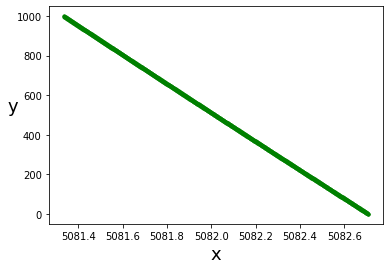

In [0]:
plt.plot(cost_history,range(n_iter),'g.')
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.show()

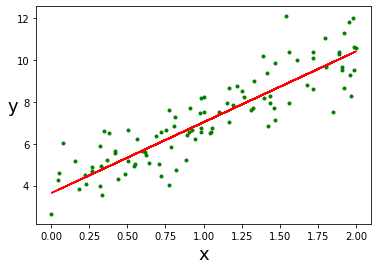

In [0]:
plt.plot(X,y,'g.')
linear_function = theta[0]*X + theta[1]
plt.plot(X,linear_function,'r-')
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.show()

Now, how does the learning rate **influence** how our model trains ?
let's see a general concept about learning rate:

![Texte alternatif…](https://miro.medium.com/max/1280/0*uykP7FsdR8P9MG6j.png)